In [1]:
##### Tatanic passengers data analysis
## This project is part of Udacity Data Analysis Nanodegree, in specific, is final project of P2 module.
####

####
## In this analysis we can try to determine who passengers have more chance to survive in Tatanic crash,
## we have the data about 891 passengers, a simple of more than 1500 passengers.
## 
## We try to response same questions, like to:
##
## If you were a woman, would have a better chance of surviving ?
## If you were kid, teenager, adult, or elderly, how is your chance have been saved ?
## If you were in first class, you would save ?
##
## Make your bets and try to save this!
####

In [169]:
import pandas as pd
import matplotlib.pyplot as plt

In [170]:
data = pd.read_csv('titanic_data.csv')

In [182]:
# Same part of data sample
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_normalized,Pclass_normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


In [177]:
# Normalize steps

#Sex male is change to number 0 and female to number 1
def sex_normalize(x):
    if x == "male": return 0
    else: return 1

#Pclass, has changed the order to try to find some correlation, being Pclass 1 = 3, 2 = 2 and 3 = 1.
def pclass_normalize(x):
    if x == 3: return 1
    elif x == 1: return 3
    else: return x

# Apply normalized functions in the data
data['Sex_normalized'] = data['Sex'].apply(sex_normalize)
data['Pclass_normalized'] = data['Pclass'].apply(pclass_normalize)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_normalized,Pclass_normalized
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


0    549
1    342
Name: Survived, dtype: int64


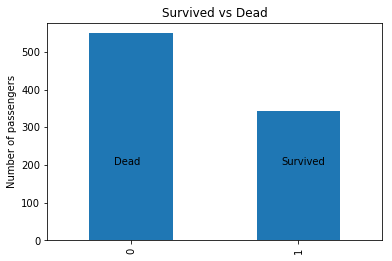

In [176]:
#### In this step, I go to show same important numbers and graph about passengers in this data.

# Survived vs Dead, all data have survived information
plt.title('Survived vs Dead')
plt.ylabel('Number of passengers')
plt.text(-0.1, 200,'Dead')
plt.text(0.9, 200,'Survived')

data.Survived.value_counts().plot.bar()
print(data.Survived.value_counts())

plt.show()

In [ ]:
# It`s obvious what have more dead, because in Tatanic didn't have enough lifeboats for all passengers,
# and in this sample data reveals this information.

In [164]:
# Informations about passengers age`s
age_isnull = data['Age'].isnull().sum()
print('# Passengers not have age described:\n%s' % age_isnull)

print('\n# About passengers age`s')
data['Age'].describe()

# Passengers not have age described:
177

# About passengers age`s


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

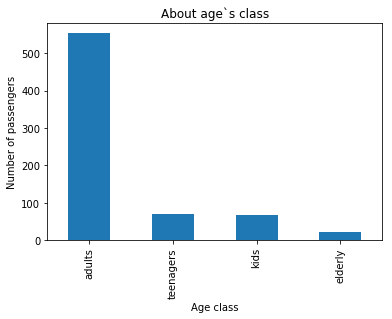

In [76]:
# About age`s class
data["age_groups"] = pd.cut(data.Age.dropna(), [0, 11, 18, 60, 100], labels=["kids", "teenagers", "adults", "elderly"])

plt.title('About age`s class')
plt.xlabel('Age class')
plt.ylabel('Number of passengers')
data['age_groups'].value_counts().plot.bar()

plt.show()

In [179]:
# Survived correlation using Pearson method
data.corr(method='pearson')['Survived'].sort_values(ascending=False)

Survived             1.000000
Sex_normalized       0.543351
Pclass_normalized    0.338481
Fare                 0.257307
Parch                0.081629
PassengerId         -0.005007
SibSp               -0.035322
Age                 -0.077221
Pclass              -0.338481
Name: Survived, dtype: float64

In [185]:
# About below results, survived have possbile correlation with (in strong order):
# - Sex
# - Pclass
# - Fare

# In correlation above, we have a weak correlation, because have a lot of hidden variables in this situation
# for example, where location of PClass passagers ?
# for correlation with Sex, by history, we can say that is strong correlation, because we know it 
# was given priority of entry into the boats for women.

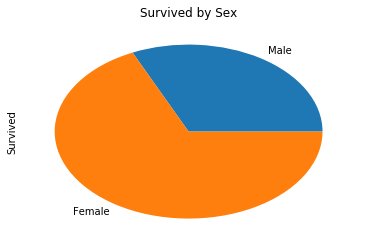

In [184]:
# Total passengers survived per sex
plt.title('Survived by Sex')
data.groupby('Sex_normalized')['Survived'].sum().plot.pie(labels=['Male', 'Female'])
plt.show()

In [ ]:
# In pie graph above, confirm strong correlation with more women survived.

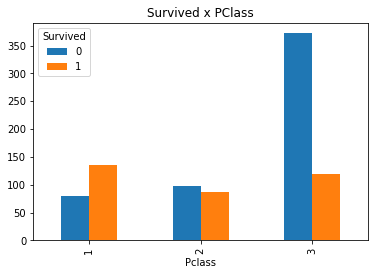

In [175]:
# Total passengers survived or not per Pclass
data.groupby(['Pclass', 'Survived']).size().unstack().plot.bar()
plt.title('Survived x PClass')
plt.show()

In [12]:
# With this sample of about 891 passengers,
# we know we have many variables and situations that are impossible to collect and analyze,
# but, with bases in our analysis, you know that if I were a woman and the first class would have higher chances of survival, 
# in case you were in the right place.